Mount drive and locate dataset (obtained from kaggle)
The dataset involves CCMCT data.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/My Drive/Colab Notebooks/MC

/content/gdrive/My Drive/Colab Notebooks/MC


Only run following code TO SAVE NEW DATASET. In this case the WSIs are stored as SVS files rather than jpeg or png.

In [ ]:
import urllib.request
import os
from tqdm import tqdm
downloadableFiles = {'databases/MITOS_WSI_CCMCT_Tumorzone.sqlite': 
                          'https://ndownloader.figshare.com/files/16261586?private_link=a82ddb634864c24f4aee' ,
                     'databases/MITOS_WSI_CCMCT_ODAEL.sqlite':
                          'https://ndownloader.figshare.com/files/16261571?private_link=a82ddb634864c24f4aee' ,
                     'databases/MITOS_WSI_CCMCT_HEAEL.sqlite':
                          'https://ndownloader.figshare.com/files/16261583?private_link=a82ddb634864c24f4aee' ,
                     'databases/MITOS_WSI_CCMCT_MEL.sqlite':
                          'https://ndownloader.figshare.com/files/16261574?private_link=a82ddb634864c24f4aee' ,
                     'WSI/96274538c93980aad8d6.svs': # 3
                          'https://ndownloader.figshare.com/files/16261559?private_link=a82ddb634864c24f4aee', 
                     'WSI/1018715d369dd0df2fc0.svs': # 20
                          'https://ndownloader.figshare.com/files/16261562?private_link=a82ddb634864c24f4aee',
                     'WSI/9374efe6ac06388cc877.svs': # 26
                          'https://ndownloader.figshare.com/files/16261553?private_link=a82ddb634864c24f4aee',
                     'WSI/552c51bfb88fd3e65ffe.svs': # 27
                          'https://ndownloader.figshare.com/files/16261556?private_link=a82ddb634864c24f4aee',
                     'WSI/285f74bb6be025a676b6.svs': # 29
                          'https://ndownloader.figshare.com/files/16261550?private_link=a82ddb634864c24f4aee',
                     'WSI/91a8e57ea1f9cb0aeb63.svs': # 24
                          'https://ndownloader.figshare.com/files/16261544?private_link=a82ddb634864c24f4aee',
                     'WSI/70ed18cd5f806cf396f0.svs': # 35
                          'https://ndownloader.figshare.com/files/16261541?private_link=a82ddb634864c24f4aee',
                     'WSI/066c94c4c161224077a9.svs': # 25 
                          'https://ndownloader.figshare.com/files/16261547?private_link=a82ddb634864c24f4aee',
                     'WSI/39ecf7f94ed96824405d.svs': # 19
                          'https://ndownloader.figshare.com/files/16261529?private_link=a82ddb634864c24f4aee',
                     'WSI/34eb28ce68c1106b2bac.svs': # 14
                          'https://ndownloader.figshare.com/files/16261538?private_link=a82ddb634864c24f4aee',
                     'WSI/20c0753af38303691b27.svs': # 21
                          'https://ndownloader.figshare.com/files/16261532?private_link=a82ddb634864c24f4aee',
                     'WSI/3f2e034c75840cb901e6.svs': # 15
                          'https://ndownloader.figshare.com/files/16261505?private_link=a82ddb634864c24f4aee',
                     'WSI/2efb541724b5c017c503.svs': #22 
                          'https://ndownloader.figshare.com/files/16261520?private_link=a82ddb634864c24f4aee',
                     'WSI/2f2591b840e83a4b4358.svs':#23
                          'https://ndownloader.figshare.com/files/16261514?private_link=a82ddb634864c24f4aee',
                     'WSI/8bebdd1f04140ed89426.svs': # 17
                          'https://ndownloader.figshare.com/files/16261523?private_link=a82ddb634864c24f4aee',
                     'WSI/8c9f9618fcaca747b7c3.svs': # 9
                          'https://ndownloader.figshare.com/files/16261526?private_link=a82ddb634864c24f4aee',
                     'WSI/2f17d43b3f9e7dacf24c.svs': # 8
                          'https://ndownloader.figshare.com/files/16261535?private_link=a82ddb634864c24f4aee',
                     'WSI/f3741e764d39ccc4d114.svs': # 31
                          'https://ndownloader.figshare.com/files/16261493?private_link=a82ddb634864c24f4aee',
                     'WSI/fff27b79894fe0157b08.svs': # 7
                          'https://ndownloader.figshare.com/files/16261490?private_link=a82ddb634864c24f4aee',
                     'WSI/f26e9fcef24609b988be.svs': # 6
                          'https://ndownloader.figshare.com/files/16261496?private_link=a82ddb634864c24f4aee',
                     'WSI/dd4246ab756f6479c841.svs': # 18
                          'https://ndownloader.figshare.com/files/16261487?private_link=a82ddb634864c24f4aee',
                     'WSI/c3eb4b8382b470dd63a9.svs': # 4
                          'https://ndownloader.figshare.com/files/16261466?private_link=a82ddb634864c24f4aee',
                     'WSI/c86cd41f96331adf3856.svs': # 30
                          'https://ndownloader.figshare.com/files/16261475?private_link=a82ddb634864c24f4aee',
                     'WSI/c91a842257ed2add5134.svs': # 1
                          'https://ndownloader.figshare.com/files/16261481?private_link=a82ddb634864c24f4aee',
                     'WSI/dd6dd0d54b81ebc59c77.svs': # 28
                          'https://ndownloader.figshare.com/files/16261478?private_link=a82ddb634864c24f4aee',
                     'WSI/be10fa37ad6e88e1f406.svs': # 11
                          'https://ndownloader.figshare.com/files/16261469?private_link=a82ddb634864c24f4aee',
                     'WSI/ce949341ba99845813ac.svs': # 34
                          'https://ndownloader.figshare.com/files/16261484?private_link=a82ddb634864c24f4aee',
                     'WSI/a0c8b612fe0655eab3ce.svs': # 13
                          'https://ndownloader.figshare.com/files/16261424?private_link=a82ddb634864c24f4aee',
                     'WSI/add0a9bbc53d1d9bac4c.svs': # 2
                          'https://ndownloader.figshare.com/files/16261436?private_link=a82ddb634864c24f4aee',
                     'WSI/2e611073cff18d503cea.svs': # 32
                          'https://ndownloader.figshare.com/files/16261439?private_link=a82ddb634864c24f4aee',
                     'WSI/0e56fd11a762be0983f0.svs': # 31
                          'https://ndownloader.figshare.com/files/16261442?private_link=a82ddb634864c24f4aee',
                     'WSI/ac1168b2c893d2acad38.svs': # 12
                          'https://ndownloader.figshare.com/files/16261445?private_link=a82ddb634864c24f4aee',
                    }

# Create folder for WSI if nonexistant
if not os.path.isdir('WSI'):
    os.mkdir('WSI')

tqdm.write('Downloading all files from figshare - take a coffee and sit down, this will take some while, we are downloading above 44GB ...')
    

from time import sleep    
sleep(0.5)

import requests

                    
for fname in tqdm(list(downloadableFiles.keys())):
    urllib.request.urlretrieve(downloadableFiles[fname],fname)

Run to load files and import libraries


In [11]:

%reload_ext autoreload
%autoreload 2
%matplotlib inline
import sqlite3
import numpy as np
from SlideRunner.dataAccess.database import Database
from tqdm import tqdm
from pathlib import Path
import openslide
import time
from fastai import *
from fastai.vision import *
from fastai.callbacks import *
from random import randint
import data_loader
from callbacks import *
from object_detection_helper import *
from RetinaNetFocalLoss import RetinaNetFocalLoss
from RetinaNet import RetinaNet
from sampling import get_slides
size=256
path = Path('./')

database = Database()
database.open(str(path/'databases/MITOS_WSI_CCMCT_ODAEL.sqlite'))

slidelist_test = ['27', '30', '31', '6', '18', '20', '1', '2', '3' ,'9', '11']

**Split Dataset into Train/Validation and Test**
Using openslide library functions

In [12]:
lbl_bbox, train_slides,val_slides,files = get_slides(slidelist_test=slidelist_test, database=database,basepath='WSI')

Loading slides .. : 100%|██████████| 32/32 [01:04<00:00,  2.00s/it]


In [13]:
#create a dictionary of files and mitosis box locations and getter function
img2bbox = dict(zip(files, np.array(lbl_bbox)))
get_y_func = lambda o:img2bbox[o]

In [15]:
bs = 16
train_images = 5000
val_images = 5000

#store as list
train_files = list(np.random.choice([files[x] for x in train_slides], train_images))
valid_files = list(np.random.choice([files[x] for x in val_slides], val_images))

In [16]:
#data augmentation, evenly distributed
tfms = get_transforms(do_flip=True,
                      flip_vert=True,
                      max_rotate=90,
                      max_lighting=0.0,
                      max_zoom=1.,
                      max_warp=0.0,
                      p_affine=0.5,
                      p_lighting=0.0,
                      #xtra_tfms=xtra_tfms,
                     )

In [17]:
from data_loader import *
train =  ObjectItemListSlide(train_files, path=path)
valid = ObjectItemListSlide(valid_files, path=path)

item_list = ItemLists(path, train, valid)
lls = item_list.label_from_func(get_y_func, label_cls=SlideObjectCategoryList) #
lls = lls.transform(tfms, tfm_y=True, size=size)
data = lls.databunch(bs=bs, collate_fn=bb_pad_collate_min).normalize()

In [ ]:
data.show_batch(rows=3, ds_type=DatasetType.Train, figsize=(15,15))

In [18]:
anchors = create_anchors(sizes=[(16,16)], ratios=[1], scales=[0.6, 0.7,0.8])
not_found = show_anchors_on_images(data, anchors)

Output hidden; open in https://colab.research.google.com to view.

In [19]:
#Obtain retina net model
crit = RetinaNetFocalLoss(anchors)

encoder = create_body(models.resnet18, True, -2)
model = RetinaNet(encoder, n_classes=data.train_ds.c, n_anchors=3, sizes=[16], chs=128, final_bias=-4., n_conv=3)

voc = PascalVOCMetric(anchors, size, [str(i-1) for i in data.train_ds.y.classes[1:]])
learn = Learner(data, model, loss_func=crit, callback_fns=[BBMetrics, ShowGraph], #BBMetrics, ShowGraph
                metrics=[voc]
               )

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [2]:
#Find optimal learning rate with fast ai library
learn.split([model.encoder[6], model.c5top5])
learn.freeze_to(-2)

learn.lr_find()
learn.recorder.plot()

NameError: ignored

In [ ]:
#CUSTOM BEST AFTER-EPOCH MODEL-SAVING CALLBACK
class SaveBestModel(Callback):
    def __init__(self, model, name='best_model'):
        self.name = name
        self.model = model
        self.best_loss = None
        self.best_acc = None

    def on_epoch_end(self, metrics):
        super().on_epoch_end(metrics)
        loss, acc = metrics
        if self.best_acc == None or acc > self.best_acc:
            self.best_acc = acc
            self.best_loss = loss
            self.model.save(f'{self.name}')
        elif acc == self.best_acc and  loss < self.best_loss:
            self.best_loss = loss
            self.model.save(f'{self.name}')


/content/gdrive/My Drive/Colab Notebooks/MC/model/RetinaNetFocalLoss.py:17: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  i = torch.min(torch.nonzero(clas_tgt - self.pad_idx))

Detections: 100%|██████████| 2182/2182 [00:00<00:00, 6236.87it/s]

GT: 100%|██████████| 2091/2091 [00:00<00:00, 5276.12it/s]


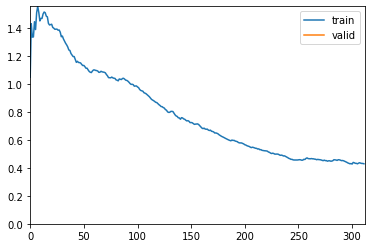

Better model found at epoch 0 with pascal_voc_metric value: 0.8286230247274492.


In [22]:
lr=1e-4
#my_cb = SaveBestModel(learn, name='best_sgdr')
learn.fit(1, lr, callbacks=[SaveModelCallback(learn, every='improvement', monitor='pascal_voc_metric', name='prototype')])

In [21]:
learn.export("../RetinaNet-ODAEL-export.pth")

/content/gdrive/My Drive/Colab Notebooks/MC/model/RetinaNetFocalLoss.py:17: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  i = torch.min(torch.nonzero(clas_tgt - self.pad_idx))
GT: 100%|██████████| 1936/1936 [00:00<00:00, 6088.46it/s]


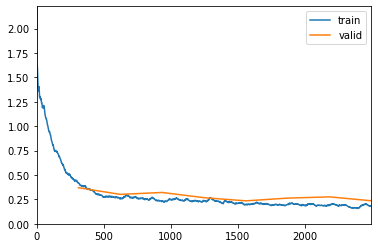

Better model found at epoch 0 with pascal_voc_metric value: 0.8628749824696348.


GT: 100%|██████████| 1820/1820 [00:00<00:00, 6629.97it/s]


Better model found at epoch 1 with pascal_voc_metric value: 0.9057510534053486.


GT: 100%|██████████| 1822/1822 [00:00<00:00, 6928.66it/s]


Better model found at epoch 5 with pascal_voc_metric value: 0.9113952507012706.


GT: 100%|██████████| 2038/2038 [00:00<00:00, 6124.19it/s]


In [22]:
#learn.unfreeze()
lr=1e-4
#learn.fit(30, lr, best_save_name='mybestmodel')

learn.fit(8, lr, callbacks=[SaveModelCallback(learn, every='improvement', monitor='pascal_voc_metric', name='model_1_ep8')])
learn.export("../RetinaNet-ODAEL-1-export.pth")

In [ ]:
slide_object_result(learn, anchors, detect_thresh=0.3, nms_thresh=0.2, image_count=10)

In [1]:
learn.fit(21, lr, callbacks=[SaveModelCallback(learn, every='improvement', monitor='pascal_voc_metric', name='model')])
learn.save('RetinaNet-ODAEL-2-save.pth', with_opt=True)
learn.export("../RetinaNet-ODAEL-2-export.pth")

NameError: ignored

In [ ]:
#PREDICT

In [ ]:
#LOAD AND CONTINUE TRAINING

**Adjusting path variables and installing any required libraries** [Run this first for new instance]

In [5]:
import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks/MC/model/')
sys.path.append('/content/gdrive/My Drive/Colab Notebooks/MC/')
sys.path.append('/content/gdrive/My Drive/Colab Notebooks/MC/lib/')

In [6]:
print(sys.path)

['', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython', '/content/gdrive/My Drive/Colab Notebooks/MC/model/', '/content/gdrive/My Drive/Colab Notebooks/MC/', '/content/gdrive/My Drive/Colab Notebooks/MC/lib/']


In [7]:
!pip install setuptools==42.0.0

In [8]:
!sudo pip3 install -U SlideRunner

Requirement already up-to-date: SlideRunner in /usr/local/lib/python3.6/dist-packages (1.31.0)


In [10]:
!sudo apt-get install openslide-tools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
openslide-tools is already the newest version (3.4.1+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
